# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [22]:
# Import your libraries
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split

from skimage import io
from skimage.color import rgb2gray


import matplotlib.pyplot as plt
%matplotlib inline 


# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts()
df.label.value_counts(normalize=True)

Sandal         0.107667
Trouser        0.102000
Ankle boot     0.100833
Shirt          0.100167
Pullover       0.099667
Coat           0.099500
T-shirt/top    0.098333
Dress          0.097500
Bag            0.097333
Sneaker        0.097000
Name: label, dtype: float64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 
pixels_col = df.columns

# Convert the all columns object into a regular list
pixels_col = list(pixels_col)

# Sanity check that it is now just a list.
print(type(pixels_col))

# Remove just the label column from the list
pixels_col.remove('label')


<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

<class 'numpy.ndarray'>


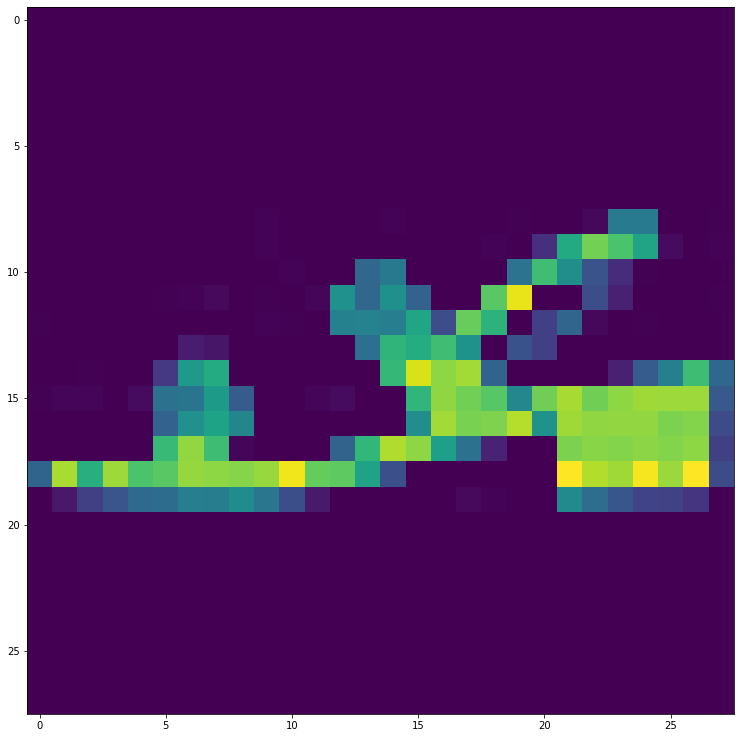

In [7]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
plt.figure(figsize=(13,13))

imgs = df[pixels_col].values
print(type(imgs))
# Select just one image from all the images
img = imgs[100]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img)

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [8]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')


<class 'list'>


### 2. Define our `X` and `y`

In [9]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [10]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [11]:
# 1. Initalize an empty Support Vector Classifier model.
# from sklearn import svm

# Initalize our Support Vector Classifier
model = SVC()

In [12]:
# 2. Fit that model with our training data. 

model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [13]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.844667


### 2. Make new predictions using our test data. 

In [14]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [15]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.92      0.93      0.93       165
         Bag       0.92      0.93      0.93       123
        Coat       0.73      0.79      0.76       134
       Dress       0.82      0.87      0.84       157
    Pullover       0.78      0.73      0.76       140
      Sandal       0.97      0.93      0.95       190
       Shirt       0.66      0.51      0.58       150
     Sneaker       0.86      0.91      0.89       137
 T-shirt/top       0.75      0.86      0.80       155
     Trouser       0.99      0.95      0.97       149

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



### 4. Plot the confusion matrix of our predicted results. 

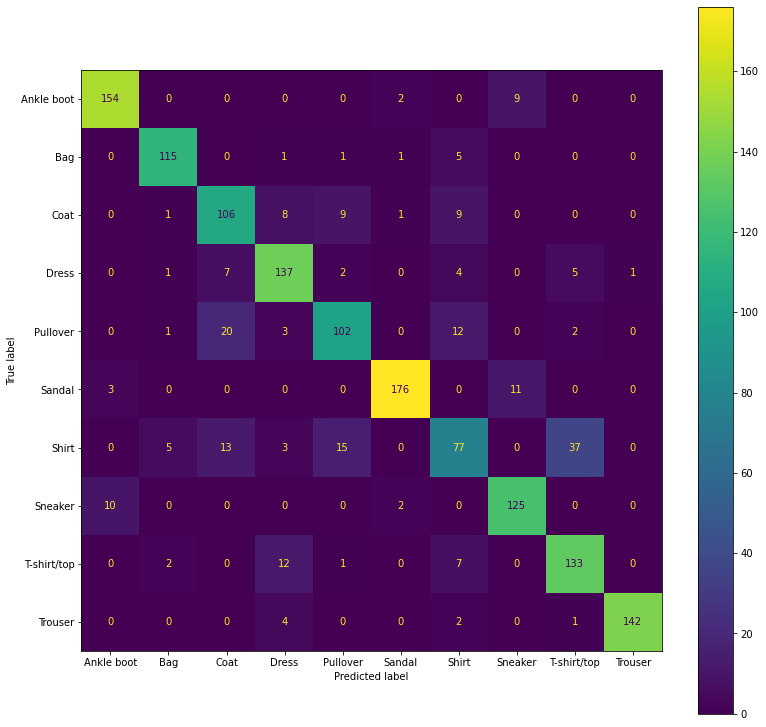

In [16]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model,
                             X=X_test,
                             y_true=y_test,
                             ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [17]:
print('The classifier mistaked T-shirt/top and shirt the most.')

The classifier mistaked T-shirt/top and shirt the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [18]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print("Accuracy %f" % accuracy)
    
    y_pred = model.predict(X_test)
    
    print(metrics.classification_report(y_test,y_pred))
    
    fig, ax = plt.subplots(figsize=(13,13))
    metrics.plot_confusion_matrix(estimator=model,
                             X=X_test,
                             y_true=y_test,
                             ax=ax)

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

/Users/idriod/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.806000
              precision    recall  f1-score   support

  Ankle boot       0.91      0.95      0.93       143
         Bag       0.91      0.93      0.92       141
        Coat       0.64      0.70      0.67       145
       Dress       0.89      0.75      0.81       154
    Pullover       0.70      0.66      0.68       149
      Sandal       0.95      0.91      0.93       171
       Shirt       0.56      0.54      0.55       147
     Sneaker       0.86      0.85      0.86       136
 T-shirt/top       0.69      0.77      0.73       144
     Trouser       0.94      0.96      0.95       170

    accuracy                           0.81      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.81      0.81      0.81      1500



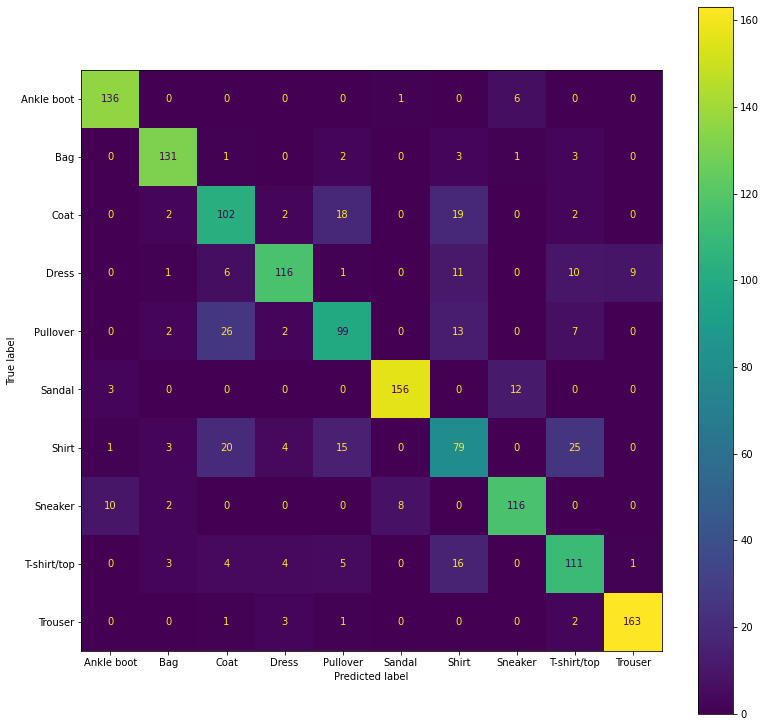

In [19]:
# LogisticRegression
model = LogisticRegression()
build_and_eval_model(model, X, y)

Accuracy 0.841333
              precision    recall  f1-score   support

  Ankle boot       0.90      0.92      0.91       137
         Bag       0.92      0.95      0.94       155
        Coat       0.73      0.79      0.75       149
       Dress       0.83      0.88      0.85       148
    Pullover       0.72      0.75      0.74       150
      Sandal       0.94      0.93      0.93       177
       Shirt       0.67      0.54      0.60       151
     Sneaker       0.86      0.87      0.86       141
 T-shirt/top       0.82      0.81      0.81       148
     Trouser       1.00      0.97      0.99       144

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



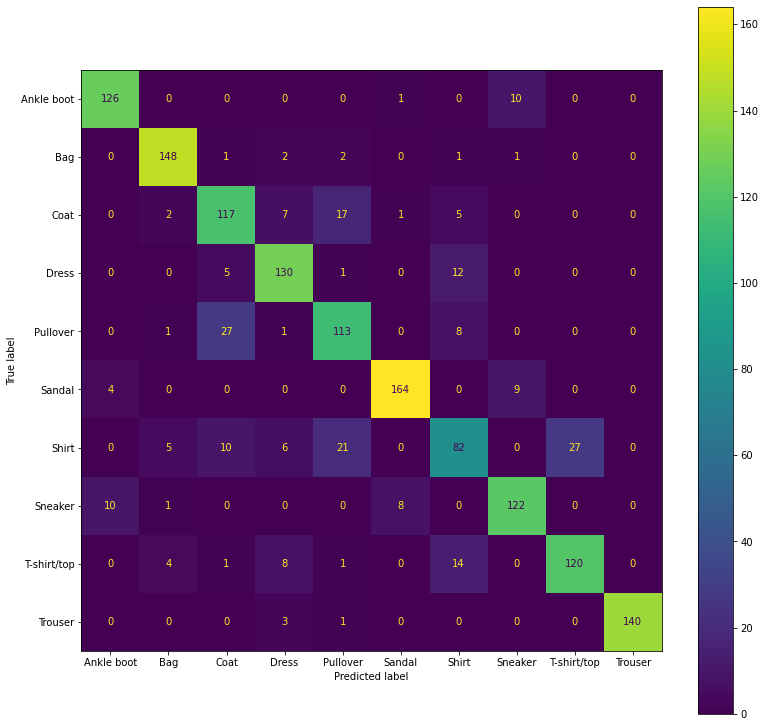

In [20]:
# RandomForest
model = RandomForestClassifier()
build_and_eval_model(model, X, y)

Accuracy 0.642000
              precision    recall  f1-score   support

  Ankle boot       0.69      0.80      0.74       169
         Bag       0.90      0.83      0.86       132
        Coat       0.46      0.68      0.55       155
       Dress       0.63      0.89      0.74       131
    Pullover       0.62      0.53      0.57       159
      Sandal       0.74      0.14      0.24       173
       Shirt       0.36      0.13      0.20       156
     Sneaker       0.53      0.89      0.67       160
 T-shirt/top       0.69      0.83      0.76       120
     Trouser       0.98      0.84      0.91       145

    accuracy                           0.64      1500
   macro avg       0.66      0.66      0.62      1500
weighted avg       0.65      0.64      0.61      1500



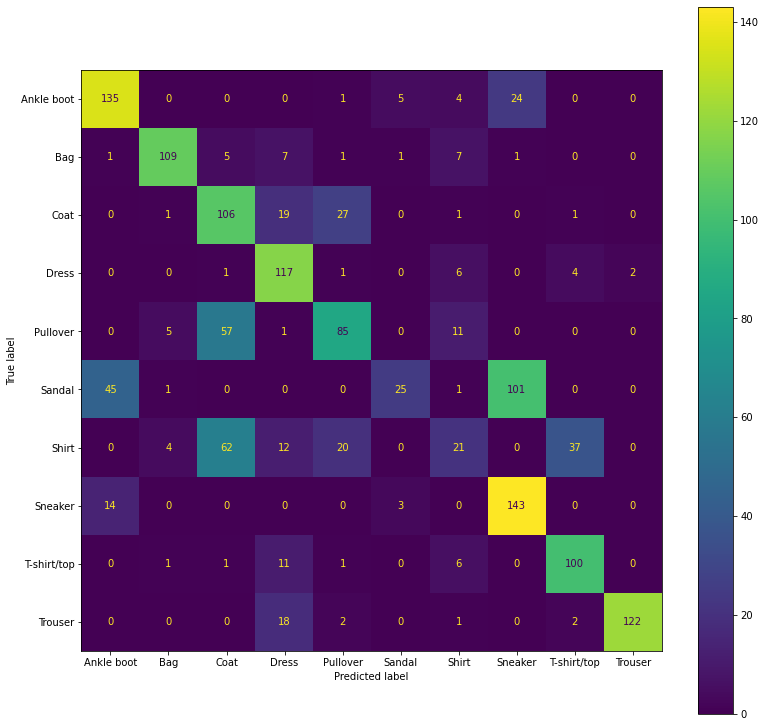

In [23]:
# MultinomialNB
model = MultinomialNB()
build_and_eval_model(model, X, y)

In [ ]:
print('SVC model did the best and MultinomialNB model did the worst.')

# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 